<a href="https://colab.research.google.com/github/MuizzuddinRifqi/2141720027-PCVK-2023/blob/main/Pertemuan%2011%20-%20Object%20Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Objek Detection

Metode yang digunakan:

1. Template Matching
2. Edge Detection
3. Corner Detection
4. Grid Detection
5. Contour Detection

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import cv2 as cv
import matplotlib.pyplot as plt
import os
import numpy as np
from google.colab.patches import cv2_imshow

2. Implementasikan 6 metode template matching pada OpenCV dengan menggunakan
gambar cats_and_bunnies.jpg dan cat2_templatejpg.jpg sebagai templatenya.


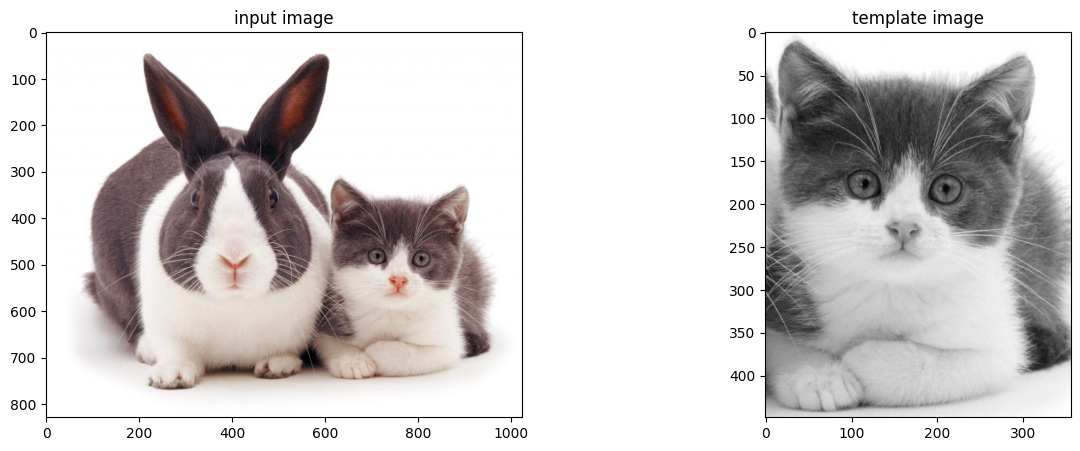

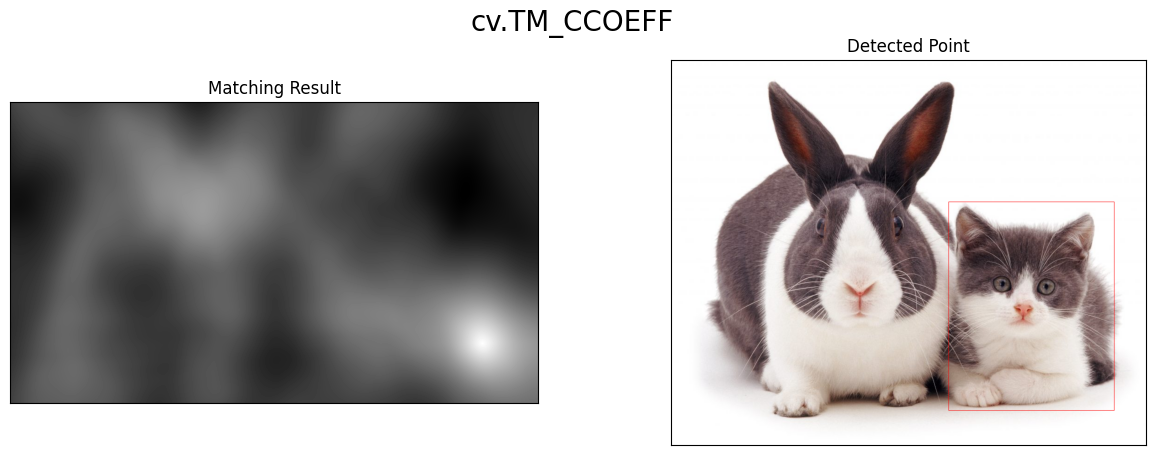

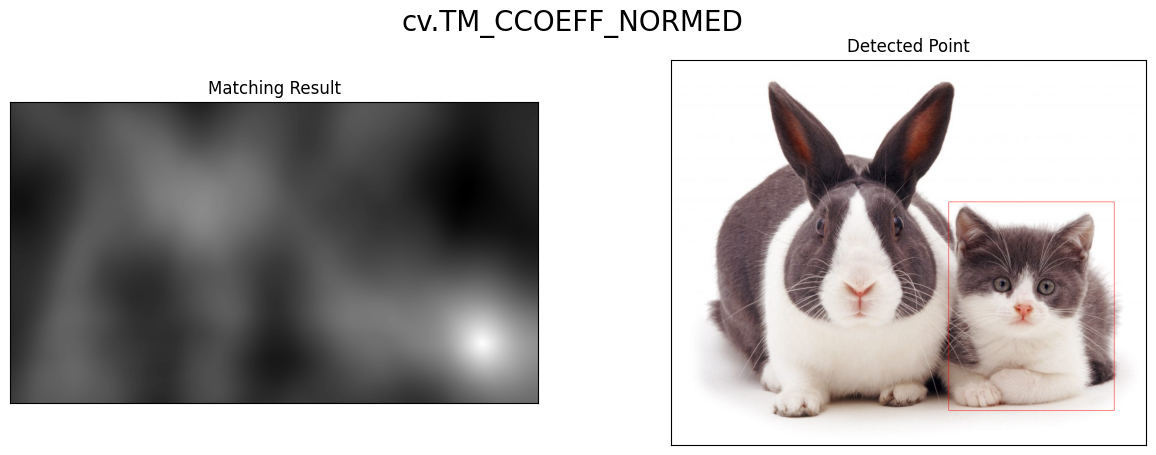

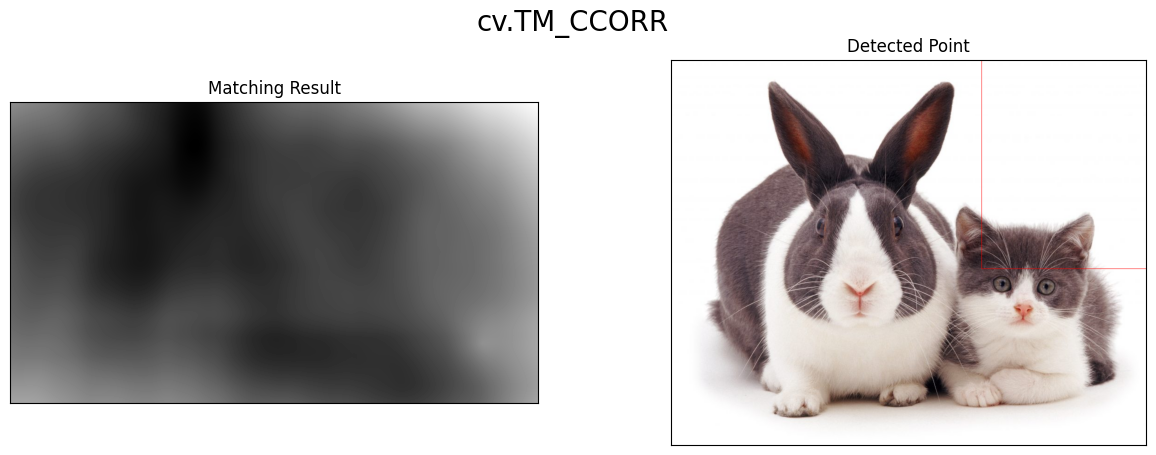

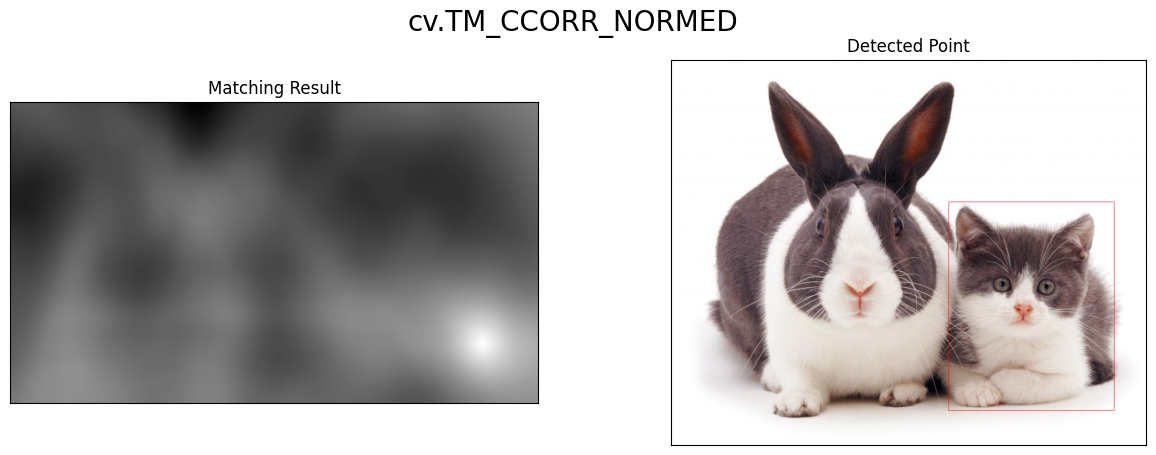

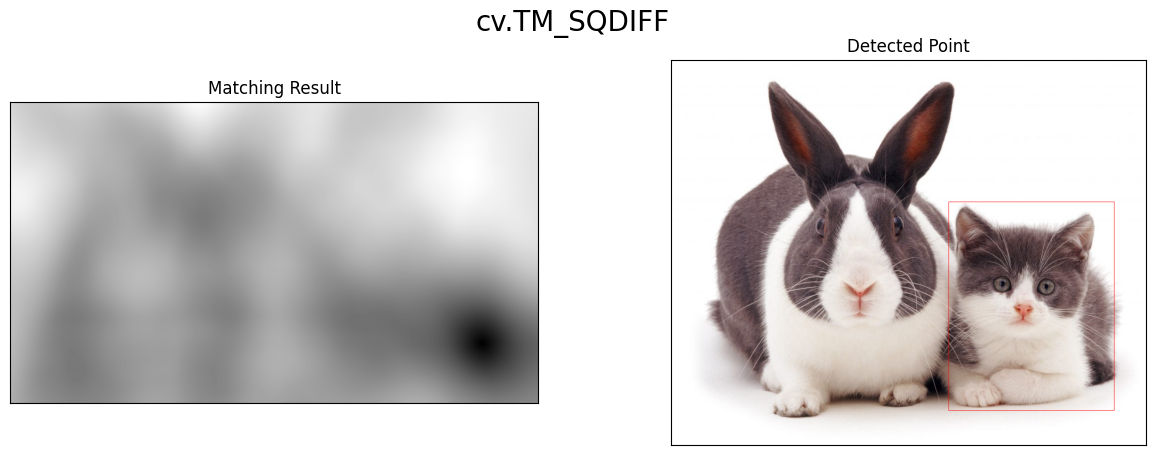

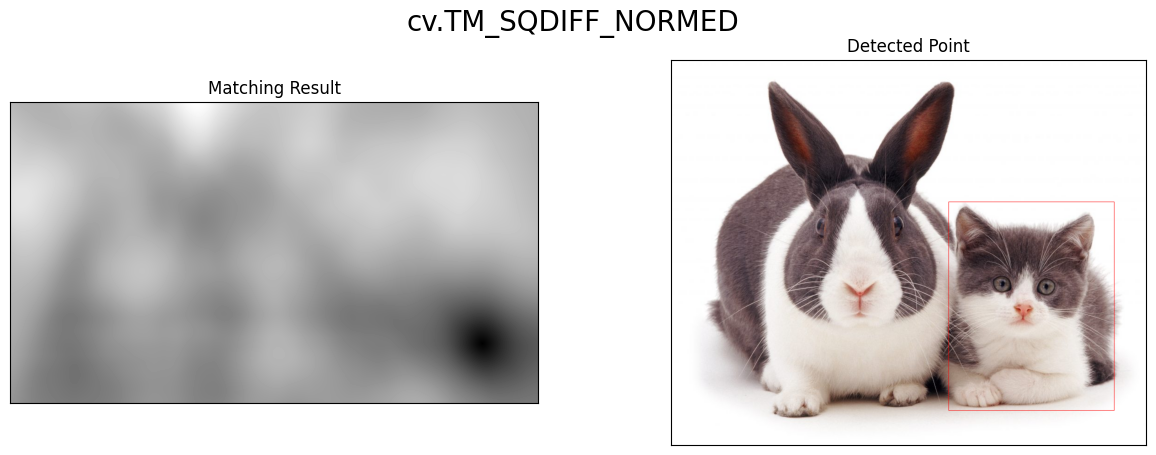

In [3]:
img = cv.imread('/content/drive/MyDrive/PCVK/assets/Object Detection/cats_and_bunnies.jpg')
img_gray = cv.cvtColor(img,cv.COLOR_BGR2GRAY)
img2 = img.copy()

#load citra template
template = cv.imread('/content/drive/MyDrive/PCVK/assets/Object Detection/cat2_templatejpg.jpg',0)
# dimensi citra
w, h = template.shape[::-1]

# print input image dan template
f, axarr = plt. subplots(1,2,figsize=(15,5)) #membuat 2 plot untuk citra input dan template
axarr[0].imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB)), axarr[0].set_title("input image")
axarr[1].imshow(cv.cvtColor(template, cv.COLOR_BGR2RGB)), axarr[1].set_title("template image")

# All the 6 methods for comparison in a list
methods = ['cv.TM_CCOEFF', 'cv.TM_CCOEFF_NORMED', 'cv.TM_CCORR',
            'cv.TM_CCORR_NORMED', 'cv.TM_SQDIFF', 'cv.TM_SQDIFF_NORMED']

for meth in methods:
    img = img2.copy()
    method = eval(meth)
    # Apply template Matching
    res = cv.matchTemplate(img_gray,template,method)
    min_val, max_val, min_loc, max_loc = cv.minMaxLoc(res)
    # If the method is TM_SQDIFF or TM_SQDIFF_NORMED, take minimum
    if method in [cv.TM_SQDIFF, cv.TM_SQDIFF_NORMED]:
        top_left = min_loc
    else:
        top_left = max_loc
    bottom_right = (top_left[0] + w, top_left[1] + h)

    cv.rectangle(img,top_left, bottom_right,(0,0,255))
    plt.figure(figsize=(15,5))
    plt.subplot(121),plt.imshow(res,cmap = 'gray')
    plt.title('Matching Result'), plt.xticks([]), plt.yticks([])
    plt.subplot(122),plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))
    plt.title('Detected Point'), plt.xticks([]), plt.yticks([])
    print("\n\n")
    plt.suptitle(meth, fontsize=20)
    plt.show()

3. Implementasikan konsep template matching tanpa menggunakan library OpenCV
untuk multiple object, menggunakan gambar bahrain.jpg untuk citra masukan dan
bahrain-template.jpg sebagai citra template, sehingga menghasilkan output sebagai
berikut:

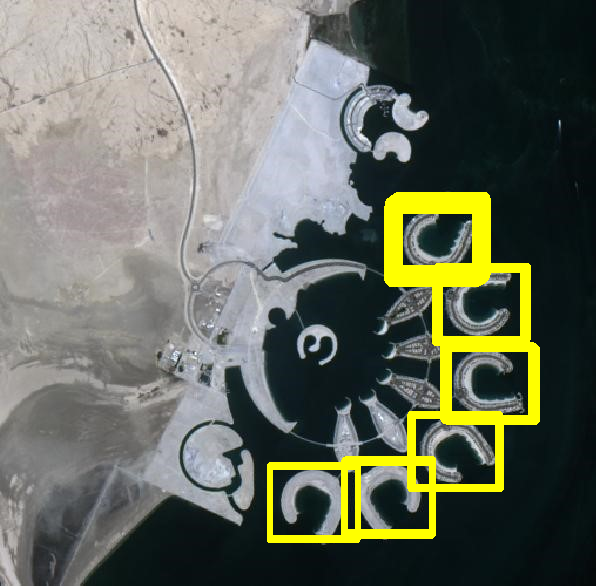

In [4]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt
img_rgb = cv.imread('/content/drive/MyDrive/PCVK/assets/Object Detection/bahrain.jpg')
assert img_rgb is not None, "file could not be read, check with os.path.exists()"
img_gray = cv.cvtColor(img_rgb, cv.COLOR_BGR2GRAY)
template = cv.imread('/content/drive/MyDrive/PCVK/assets/Object Detection/bahrain-template.jpg', cv.IMREAD_GRAYSCALE)
assert template is not None, "file could not be read, check with os.path.exists()"
w, h = template.shape[::-1]
res = cv.matchTemplate(img_gray,template,cv.TM_CCOEFF_NORMED)
threshold = 0.43
loc = np.where( res >= threshold)
for pt in zip(*loc[::-1]):
    cv.rectangle(img_rgb, pt, (pt[0] + w, pt[1] + h), (0,255,255), 2)

cv2_imshow(img_rgb)

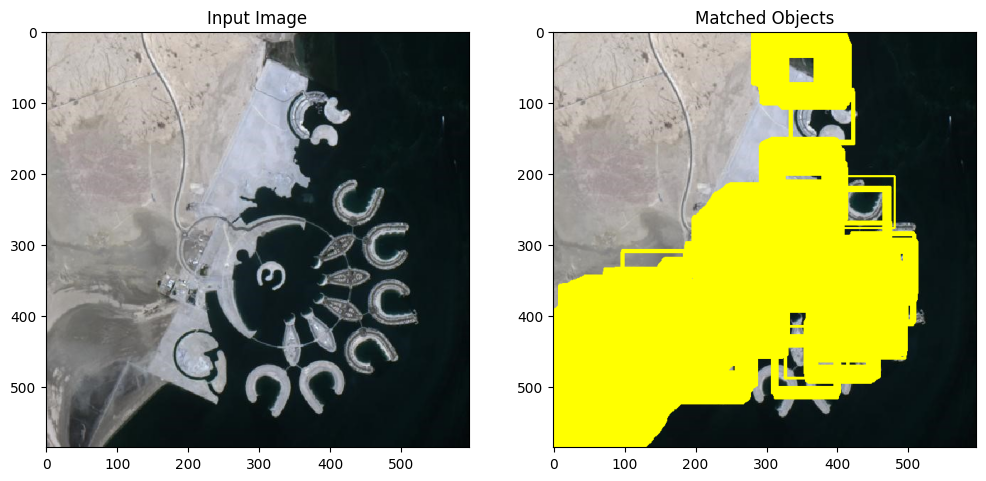

In [5]:
from PIL import Image

input_image = np.array(Image.open('/content/drive/MyDrive/PCVK/assets/Object Detection/bahrain.jpg'))
template_image = np.array(Image.open('/content/drive/MyDrive/PCVK/assets/Object Detection/bahrain-template.jpg'))

def template_matching(input_image, template):
    input_height, input_width, _ = input_image.shape
    template_height, template_width, _ = template.shape

    # Initialize an array to store match scores
    match_scores = np.zeros((input_height - template_height + 1, input_width - template_width + 1))

    # Perform template matching
    for y in range(input_height - template_height + 1):
        for x in range(input_width - template_width + 1):
            roi = input_image[y:y+template_height, x:x+template_width, :]
            diff = np.abs(roi - template).mean()
            match_scores[y, x] = diff

    return match_scores

# Perform template matching
match_scores = template_matching(input_image, template_image)

# Set a threshold to determine if a region matches the template
threshold = 110

# Find matched locations where the match score is below the threshold
matched_locations = np.where(match_scores < threshold)

# Create a copy of the input image to draw rectangles on
output_image = input_image.copy()

# Draw yellow rectangles around matched objects
for y, x in zip(*matched_locations):
    cv.rectangle(output_image, (x, y), (x + template_image.shape[1], y + template_image.shape[0]), (255, 255, 0), 2)

# Display the results
plt.figure(figsize=(12, 6))
plt.subplot(121), plt.imshow(input_image), plt.title('Input Image')
plt.subplot(122), plt.imshow(output_image), plt.title('Matched Objects')
plt.show()

4. Implementasikan metode Sobel Edge Detection, Canny Edge Detection, dan Laplacian
Edge Detection pada OpenCV dengan menggunakan gambar car-park.jpg, sehingga
menghasilkan luaran sebagai berikut:


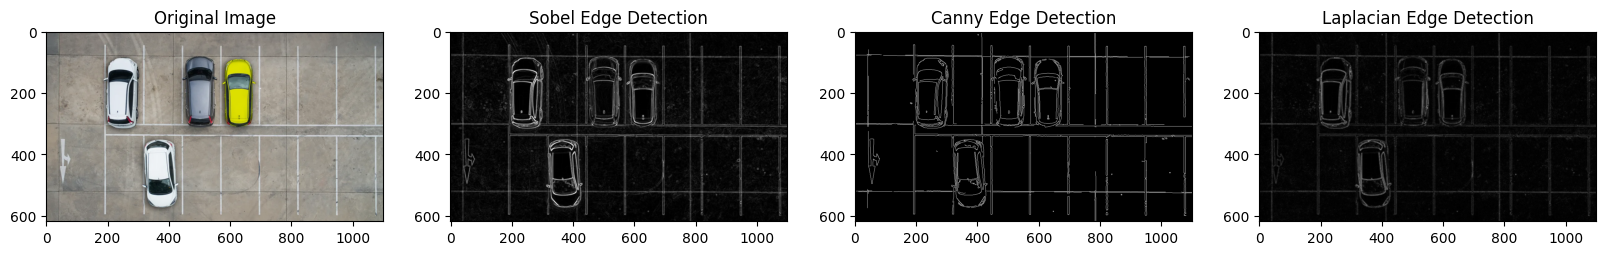

In [6]:
img0 = cv.imread('/content/drive/MyDrive/PCVK/assets/Object Detection/car-park.jpg')
gray = cv.cvtColor(img0, cv.COLOR_BGR2GRAY)
img = cv.GaussianBlur(gray, (3, 3), 0)

img_sobelx = cv.Sobel(img, cv.CV_64F, 1, 0, ksize=3)
img_sobely = cv.Sobel(img, cv.CV_64F, 0, 1, ksize=3)
img_sobelxy = cv.addWeighted(cv.convertScaleAbs(img_sobelx), 0.5, cv.convertScaleAbs(img_sobely), 0.5, 0)

edges_canny = cv.Canny(img, 100, 200)

img_laplacian = cv.Laplacian(img, cv.CV_64F)
img_laplacian = cv.convertScaleAbs(img_laplacian)

f, axarr = plt.subplots(1, 4, figsize=(20, 5))

axarr[0].imshow(cv.cvtColor(img0, cv.COLOR_BGR2RGB))
axarr[0].set_title('Original Image')

axarr[1].imshow(img_sobelxy, cmap='gray')
axarr[1].set_title('Sobel Edge Detection')

axarr[2].imshow(edges_canny, cmap='gray')
axarr[2].set_title('Canny Edge Detection')

axarr[3].imshow(img_laplacian, cmap='gray')
axarr[3].set_title('Laplacian Edge Detection')

plt.show()

5. Implementasikan metode Harris Corner Detection dan Shi-Tomasi Detection pada
OpenCV dengan menggunakan gambar chess-board.jpg, sehingga menghasilkan
luaran sebagai berikut:


5. a. Harris Corner Detection

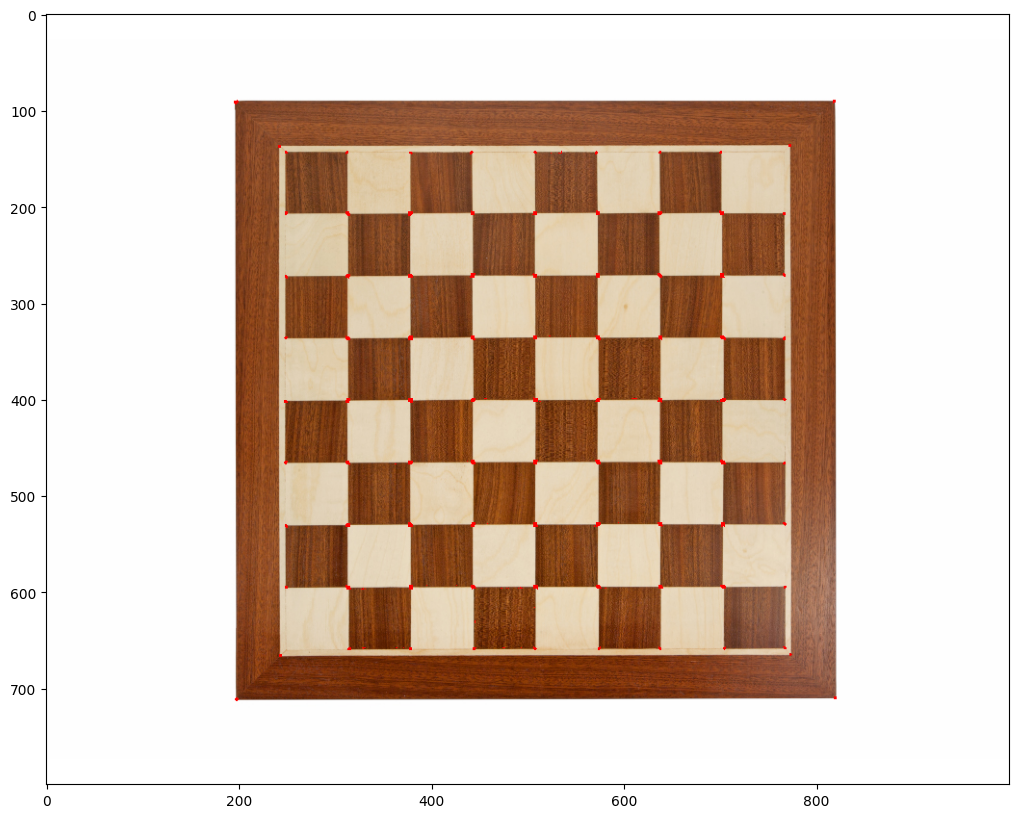

In [7]:
#Harris Corner Detection

#load citra input
input_img = cv.imread('/content/drive/MyDrive/PCVK/assets/Object Detection/chess-board.jpg')
gray_img = cv.cvtColor(input_img, cv.COLOR_BGR2GRAY)
dst = cv.cornerHarris(gray_img,3,1,0.04)

gray_img = np.float32(gray_img)
harris_output = cv.cornerHarris(gray_img,2,3, 3)
#hasil harris corner dilakukan dilasi untuk menandai sudut
harris_output = cv.dilate(harris_output, None)

#Threshold untuk mengoptimalkan nilai
input_img[dst>0.01*dst.max()]=[0,0,255]

plt.figure(figsize=(20,10))
plt.imshow(cv.cvtColor(input_img, cv.COLOR_BGR2RGB))

5. b. Shi-Tomasi Detection

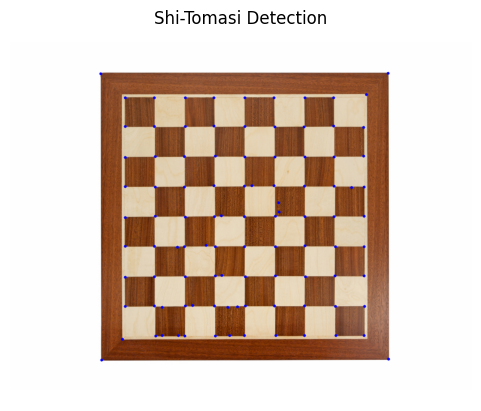

In [8]:
#shi - thomasi

# Baca gambar chess-board.jpg
img = cv.imread('/content/drive/MyDrive/PCVK/assets/Object Detection/chess-board.jpg')
gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

# Metode Shi-Tomasi Detection
corners = cv.goodFeaturesToTrack(gray, 100, 0.01, 10)

# Konversi koordinat titik sudut ke bilangan bulat
corners = np.int0(corners)

# Gambar lingkaran pada setiap sudut yang ditemukan
for corner in corners:
    x, y = corner.ravel()
    cv.circle(img, (x, y), 3, 255, -1)

# Tampilkan hasil Shi-Tomasi Detection
plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))
plt.title('Shi-Tomasi Detection')
plt.axis('off')
plt.show()

6. Implementasikan metode Hough Transform pada OpenCV dengan menggunakan
gambar sudoku.jpg. Tahapan proses grid detection sesuai yang terdapat pada ulasan
teori, sehingga menghasilkan luaran sebagai berikut:

number of Hough lines: 33
Number of filtered lines: 1
Number of filtered lines: 2
Number of filtered lines: 3
Number of filtered lines: 4
Number of filtered lines: 5
Number of filtered lines: 6
Number of filtered lines: 7
Number of filtered lines: 8
Number of filtered lines: 9
Number of filtered lines: 10
Number of filtered lines: 11
Number of filtered lines: 12
Number of filtered lines: 13
Number of filtered lines: 14
Number of filtered lines: 14
Number of filtered lines: 15
Number of filtered lines: 15
Number of filtered lines: 15
Number of filtered lines: 16
Number of filtered lines: 16
Number of filtered lines: 17
Number of filtered lines: 17
Number of filtered lines: 18
Number of filtered lines: 18
Number of filtered lines: 19
Number of filtered lines: 19
Number of filtered lines: 19
Number of filtered lines: 20
Number of filtered lines: 20
Number of filtered lines: 20
Number of filtered lines: 20
Number of filtered lines: 20
Number of filtered lines: 20


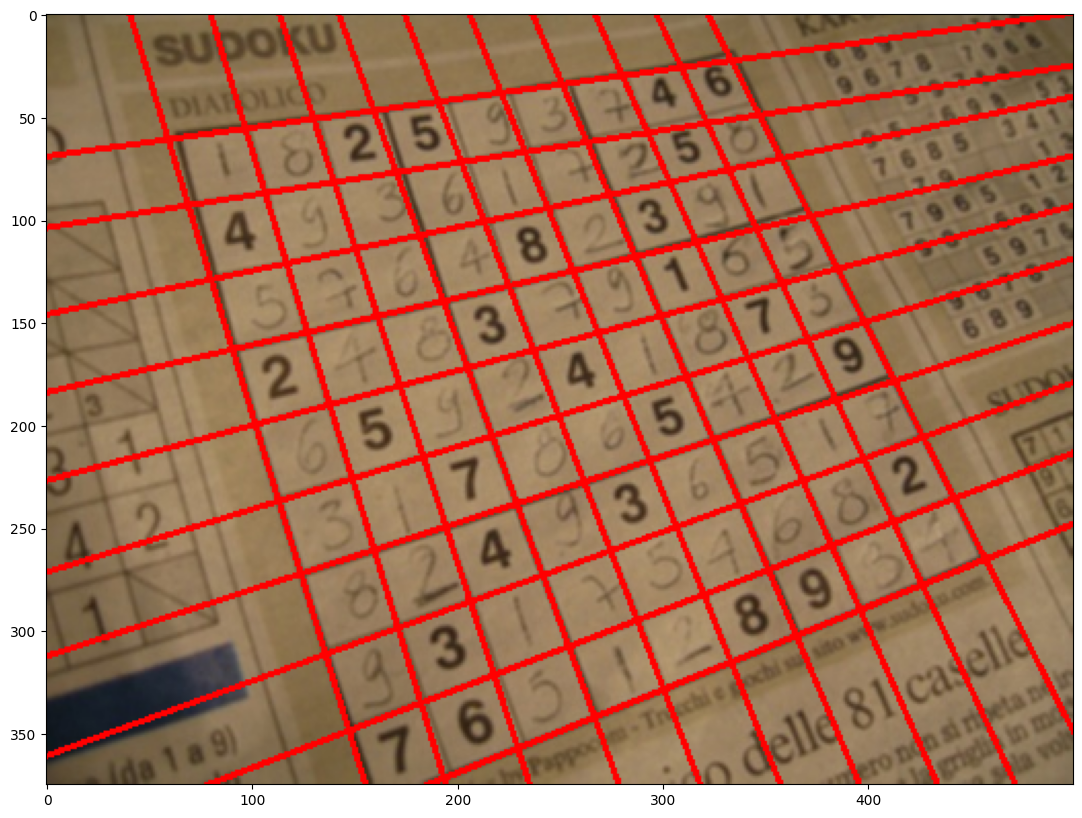

In [9]:
input_img = cv.imread('/content/drive/MyDrive/PCVK/assets/Object Detection/sudoku.jpg')
img_gray = cv.cvtColor(input_img, cv.COLOR_BGR2GRAY)

edges = cv.Canny (img_gray, 90, 150, apertureSize = 3)

kernel = np.ones((3,3), np.uint8)
edges = cv.dilate(edges,kernel,iterations = 1)

kernel = np.ones((5,5), np.uint8)
edges = cv.erode (edges, kernel, iterations = 1)

lines = cv.HoughLines(edges,1,np.pi/180,150)


if not lines.any():
    print('No lines found')
    exit()

if filter:
    rho_threshold = 15
    theta_threshold = 0.1


    similar_lines = {i : [] for i in range(len(lines))}
    for i in range(len(lines)):
      for j in range (len (lines)):
        if i == j:
            continue

        rho_i, theta_i = lines[i][0]
        rho_j, theta_j = lines[j][0]
        if abs(rho_i - rho_j) < rho_threshold and abs (theta_i - theta_j) < theta_threshold:
            similar_lines[i].append(j)

    indices = [i for i in range(len(lines))]
    indices.sort(key=lambda x: len(similar_lines[x]))

    line_flags = len(lines) *[True]
    for i in range(len(lines) - 1):
        if not line_flags [indices[i]]:
            continue

        for j in range(i + 1, len(lines)):
            if not line_flags[indices[j]]:
                continue
            rho_i, theta_i = lines[indices[i]][0]
            rho_j, theta_j = lines[indices[j]][0]
            if abs(rho_i - rho_j) < rho_threshold and abs(theta_i - theta_j) < theta_threshold:
                line_flags [indices[j]] = False
    print('number of Hough lines:', len(lines))

    filtered_lines = []

    if filter:
        for i in range(len(lines)):
            if line_flags[i]:
                filtered_lines.append(lines[i])

            print('Number of filtered lines:', len(filtered_lines ))
    else:
        filtered_lines = lines

    for line in filtered_lines:
        rho, theta = line [0]
        a = np.cos(theta)
        b = np.sin(theta)
        x0 = a*rho
        y0 = b*rho
        x1 = int(x0 + 1000*(-b))
        y1 = int(y0 + 1000*(a))
        x2 = int(x0 - 1000*(-b))
        y2 = int(y0 - 1000*(a))

        cv.line(input_img, (x1, y1), (x2,y2),(0,0,255),2)

    plt.figure(figsize=(20,10))
    plt.imshow(cv.cvtColor(input_img, cv.COLOR_BGR2RGB))

7. Implementasikan fungsi findContours() pada OpenCV untuk contour detection deng

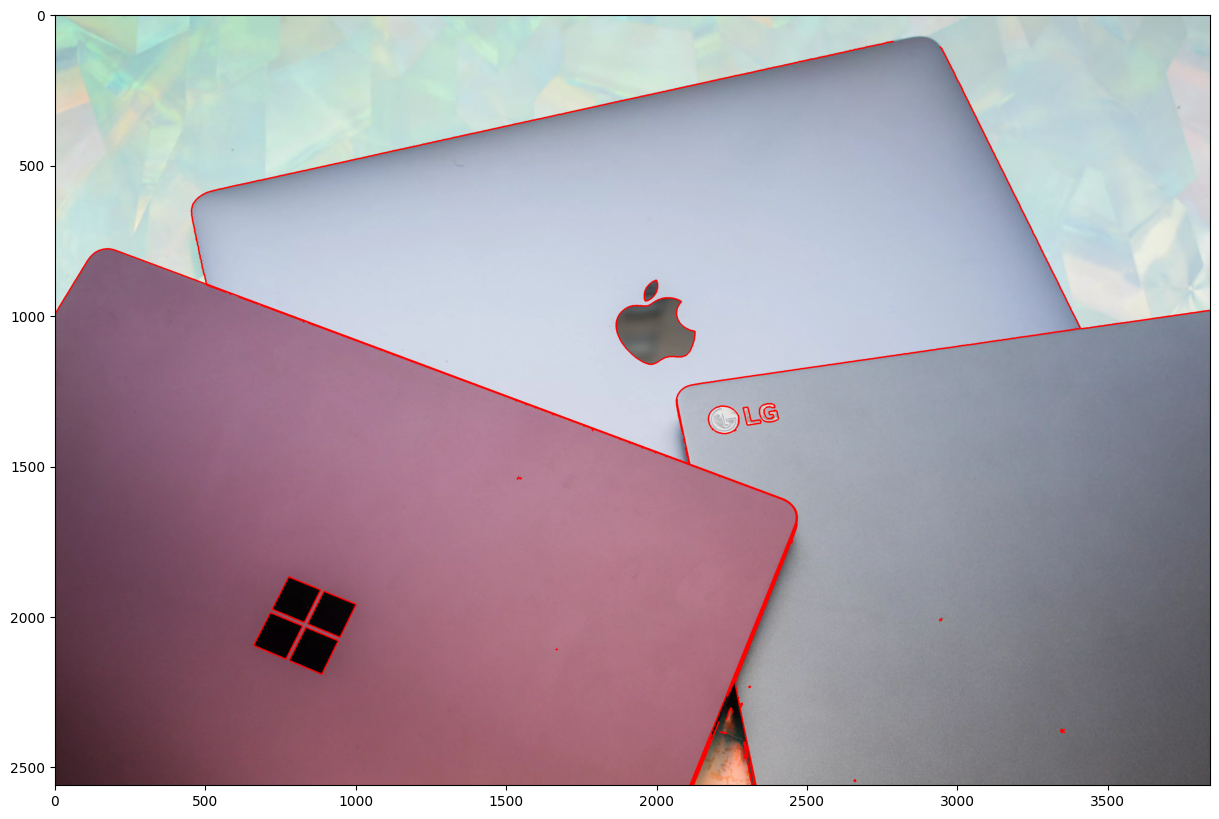

In [10]:
img = cv.imread('/content/drive/MyDrive/PCVK/assets/Object Detection/laptop.jpg')
img_gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

edged = cv.Canny(img_gray, 30, 200)

contours, hierarchy = cv.findContours(edged, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_NONE)

cv.drawContours(img, contours, -1, (0,0,255), 3)

plt.figure(figsize=(20,10))
plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))

**Tugas Praktikum**

In [16]:
import cv2

In [17]:
KTPTEMPLATE='/content/drive/MyDrive/PCVK/assets/Object Detection/face.png'

KTP='/content/drive/MyDrive/PCVK/assets/KTP2.jpg'

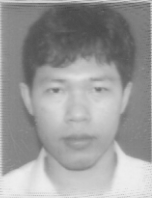

In [21]:
# Baca gambar template KTP
templateKTP = cv2.imread(KTPTEMPLATE, 0)

# Tampilkan gambar template KTP
cv2_imshow(templateKTP)

# Baca gambar KTP lainnya
ktpImage = cv2.imread(KTP)


In [22]:
# Salin gambar KTP ke dalam variabel 'blurred'
blurred = ktpImage.copy()

# Salin gambar yang telah diburam ke dalam variabel 'gray'
gray = blurred.copy()

# Terapkan Gaussian Blur pada gambar KTP yang telah disalin
# (5, 5) adalah ukuran kernel, dan 0.5 adalah nilai sigma (menentukan seberapa banyak gambar akan diburamkan)
blurred = cv.GaussianBlur(ktpImage, (5, 5), 0.5)


154.0 (412, 662)


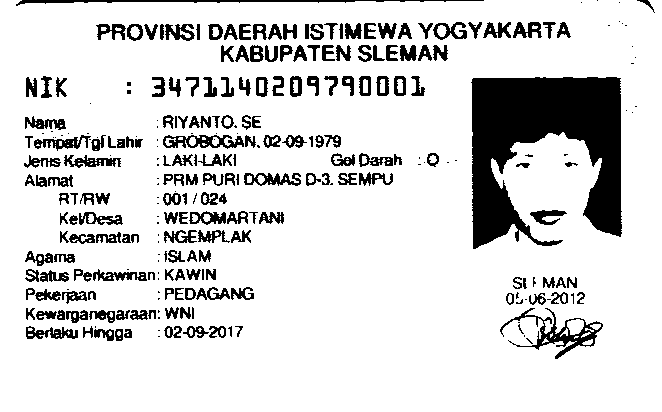

In [23]:
# Ubah gambar yang telah diburam ke citra abu-abu (grayscale)
gray = cv.cvtColor(blurred, cv.COLOR_BGR2GRAY)

# Thresholding biner menggunakan metode Otsu
# Nilai threshold (ret) dan gambar hasil thresholding (bw) akan dihasilkan
ret, bw = cv.threshold(gray.copy(), 0, 255, cv.THRESH_BINARY + cv.THRESH_OTSU)

# Cetak nilai threshold (ret) dan bentuk gambar hasil thresholding (bw)
print(ret, bw.shape)

# Tampilkan gambar hasil thresholding
cv2_imshow(bw)


In [24]:
# Operasi erosi pada gambar hasil thresholding (bw)
erode = cv2.erode(bw.copy(), cv2.getStructuringElement(cv2.MORPH_OPEN, (1, 1)))


In [25]:
# Temukan kontur pada gambar hasil erosi
contours, hierarchy = cv2.findContours(erode.copy(), cv2.RETR_TREE, cv2.CHAIN_APPROX_NONE)

# Looping kontur untuk mendapatkan kontur yang sesuai
for cnt in contours:
    # Dapatkan koordinat dan ukuran kotak persegi yang melingkupi kontur
    x, y, w, h = cv2.boundingRect(cnt)

    # Hitung rasio tinggi terhadap lebar
    ras = format(w / h, '.2f')

    # Cek kriteria untuk menggambar kotak persegi
    if h >= 40 and w >= 10 and float(ras) <= 1:
        # Gambar kotak persegi di sekitar objek yang memenuhi kriteria
        cv2.rectangle(ktpImage, (x, y), (x + w, y + h), (0, 255, 0), thickness=1)

        # Cetak informasi tentang objek yang memenuhi kriteria
        print("+ x={}, y={}, w={}, h={}, rasio={}".format(x, y, w, h, ras))


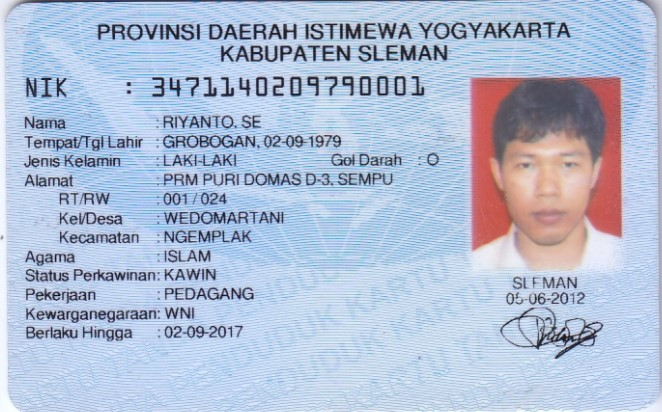

In [26]:
cv2_imshow(ktpImage)

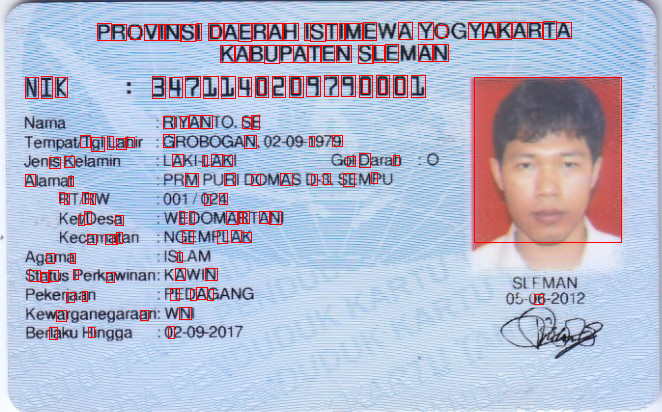

In [27]:
import cv2

# Baca gambar KTP
ktpImage = cv2.imread('/content/drive/MyDrive/PCVK/assets/KTP2.jpg')

# Ubah gambar menjadi skala abu-abu untuk deteksi tepi
gray = cv2.cvtColor(ktpImage, cv2.COLOR_BGR2GRAY)

# Lakukan Gaussian Blur untuk mengurangi noise
blurred = cv2.GaussianBlur(gray, (5, 5), 0)  # (5, 5) adalah ukuran kernel Gaussian, dan 0 adalah deviation

# Thresholding untuk membuat gambar biner
ret, thresholded = cv2.threshold(blurred, 127, 255, cv2.THRESH_BINARY)

# Deteksi tepi menggunakan Canny (jika diperlukan)
# edges = cv2.Canny(thresholded, 30, 150)  # Parameter: Gambar, Batas bawah, Batas atas

# Temukan kontur pada gambar biner
contours, hierarchy = cv2.findContours(thresholded, cv2.RETR_CCOMP, cv2.CHAIN_APPROX_SIMPLE)

# Gambar kontur pada gambar asli
for cnt in contours:
    # Dapatkan koordinat dan ukuran kotak persegi yang melingkupi kontur
    x, y, w, h = cv2.boundingRect(cnt)

    # Hitung rasio tinggi terhadap lebar
    ras = format(w / h, '.2f')

    # Cek kriteria untuk menggambar kotak persegi
    if h >= 40 and w >= 10 and float(ras) <= 1:
        cv2.rectangle(ktpImage, (x, y), (x + w, y + h), (0, 0, 255), thickness=1)  # Warna merah untuk kriteria pertama
    elif h >= 10 and w >= 5 and float(ras) <= 1:
        cv2.rectangle(ktpImage, (x, y), (x + w, y + h), (0, 255, 0), thickness=1)  # Warna hijau untuk kriteria kedua

# Tampilkan gambar dengan kontur
cv2_imshow(ktpImage)
